*Cola:* Sucesión de entidades que esperan para recibir o realizar un servicio.

**Tipos**


*   FIFO (First In, First Out)
*   LIFO (Last In, Last Out)
*   SIRO (Service In Random Order)
*   SPT, SPTF (Shortest Processing Time First)
*   PR (acording to PRiority)

Ejemplo con sistema FIFO:

In [1]:
import numpy as np
import random as rnd
import math
import matplotlib.pyplot as plt

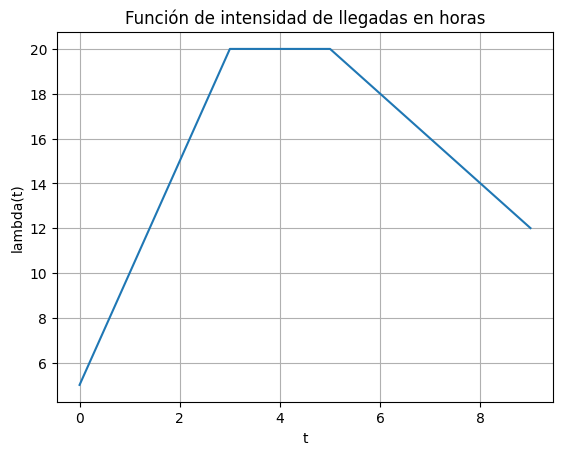

In [2]:
# Generación de llegadas

def lambda_t(x):  # Definimos la función a trozos
    if 0 <= x < 3:
        resultado = 5 + 5 * x
    elif 3 <= x < 5:
        resultado = 20
    elif 5 <= x <= 9:
        resultado = 20 - 2 * (x - 5)
    else:
        resultado = 0
    return resultado

lambda_t_vec = np.vectorize(lambda_t)

# Rango de valores para x
x = np.linspace(0, 9, 100)

# Graficar la función
plt.plot(x, lambda_t_vec(x))
plt.xlabel('t')
plt.ylabel('lambda(t)')
plt.title('Función de intensidad de llegadas en horas')
plt.grid(True)
plt.show()

In [3]:
# Definir los parámetros
S = []  # Lista vacía para almacenar las llegadas
l = np.array([10, 15, 20, 18, 16, 14])  # Tasa de llegada en diferentes intervalos
te = np.array([1, 2, 6, 7, 8, 9])  # Tiempos de finalización de intervalos
cierre = 9
k = len(te)

def procpois2():
    t = 0
    I = 0
    J = 0
    M = 0
    S = []

    while True:
        # Generar tiempo de llegada
        X = -(1/l[J]) * np.log(np.random.uniform())

        if X + t <= te[J] and J < k:
            t = X + t
        u2 = np.random.uniform()

        if u2 <= lambda_t(t) / l[J]:
            I += 1
            S.append(t)
        else:
            M += 1

        # Cambiar de intervalo
        if X + t > te[J] and J < k - 1:
            X = l[J] * (X - (te[J] - t)) / l[J+1]
            t = te[J]
            J += 1

        if X + t > te[J] and J == k - 1:
            break

    print('Tasa de aceptación:')
    print(len(S) / (M + I))
    print('S:')
    return S

# Llamar a la función procpois2
LL = procpois2()

# Añadir infinito al final del vector de llegadas
LL.append(np.inf)
print(LL)

Tasa de aceptación:
0.9375
S:
[0.1735938080287696, 0.32282975087673876, 0.4433784487604728, 0.5819687609321577, 0.5988131454481798, 0.6711446046857983, 0.7837635378328283, 0.7957196649435562, 1.0175081696634454, 1.039215177283936, 1.7714628175952165, 2.3132017056245426, 2.3157813988713514, 2.3943415425828745, 2.4630757463066484, 2.485695707570399, 2.501335978881162, 2.540385327029213, 2.546505822728335, 2.585312615877271, 2.6221719839858646, 2.6462640237047665, 2.7872262447316105, 2.8217354777095074, 2.856399515713693, 2.9847262330681823, 3.005955736185978, 3.0184031414474117, 3.1688489027715523, 3.211589487652052, 3.2191793334705494, 3.3440948665739434, 3.441404850534023, 3.4420466597011066, 3.529659023937772, 3.536602811553021, 3.5425900850902265, 3.5722407717473863, 3.72086824648164, 3.7262941521306674, 3.7844134927170527, 3.804527242161167, 3.889927552372992, 4.06780847874911, 4.30199930479472, 4.361225543048998, 4.3689760588334945, 4.371700614748998, 4.38966880915567, 4.4069170992

In [4]:
# Generación de tiempo de servicio

# Definir la función tserv
def tserv():
    t = (-1 / 20) * np.log(np.random.uniform())
    return t

# Llamar a la función
tserv()

0.00029638947022563977

In [7]:
# Función principal que simula el sistema
def unserv(LL, cierre):
    t = 0  # variable tiempo
    NLL = 0  # contador de llegadas
    NS = 0  # contador de salidas
    n = 0  # clientes en el sistema
    Y = []  # tiempos de atención
    Sal = []  # instantes de salida
    c = []  # clientes en el sistema
    Tp = 0  # tiempo después de cierre

    # Lista de sucesos
    tLL = LL[0]  # instante de llegada del cliente 1
    tS = np.inf  # instante de salida del cliente
    tm = []  # tiempo cliente en el sistema
    i = 0
    j = 0

    while True:
        # Caso 1: llegada antes de la salida y antes del cierre
        if (tLL <= tS) and (tLL <= cierre):
            t = tLL  # t al instante de llegada
            NLL += 1  # contador de llegadas
            i += 1
            tLL = LL[i]  # leemos la siguiente llegada
            n += 1  # SS: número de clientes en el sistema
            c.append(n)  # recogemos el número de clientes en el sistema

            if n == 1:  # si es el único cliente en el sistema
                Y.append(tserv())  # tiempos de atención
                tS = t + Y[j]  # asignamos un tiempo de atención
                j += 1

        # Caso 2: salida antes de la llegada y antes del cierre
        elif (tS <= tLL) and (tS <= cierre):
            t = tS
            NS += 1
            n -= 1
            c.append(n)
            Sal.append(t)
            tm.append(Sal[NS-1] - LL[NS-1])  # tiempo en el sistema

            if n == 0:
                tS = np.inf  # sin clientes
            else:
                Y.append(tserv())  # generar tiempo de servicio
                tS = t + Y[j]
                j += 1

        # Caso 3: después del cierre, pero aún hay clientes en el sistema
        elif min(tLL, tS) > cierre:
            if n > 0:
                t = tS
                NS += 1
                n -= 1
                c.append(n)
                Sal.append(t)
                tm.append(Sal[NS-1] - LL[NS-1])

                if n > 0:
                    Y.append(tserv())
                    tS = t + Y[j]
                    j += 1
            else:
                Tp = max(t - cierre, 0)
                break

    if tS == np.inf:
        tS = t

    # Resultados
    resultados = {
        'tiempos en el sistema': tm,
        'clientes en el sistema': c,
        'tiempo medio cliente en el sistema': np.mean(tm) if tm else 0,
        'número medio clientes en el sistema': np.mean(c),
        'tiempo después cierre': Tp,
        'tiempos atención': Y,
        'última salida': tS
    }

    return resultados

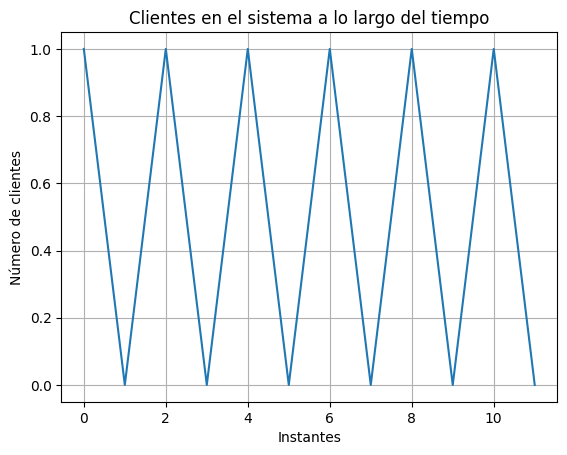

In [8]:
# Simulación del sistema para un conjunto de llegadas LL
LL = np.array([1, 2, 6, 7, 8, 9, np.inf])  # Ejemplo de llegadas
resultados = unserv(LL, 9)

# Graficar los clientes en el sistema a lo largo del tiempo
plt.plot(resultados['clientes en el sistema'])
plt.title('Clientes en el sistema a lo largo del tiempo')
plt.xlabel('Instantes')
plt.ylabel('Número de clientes')
plt.grid(True)
plt.show()

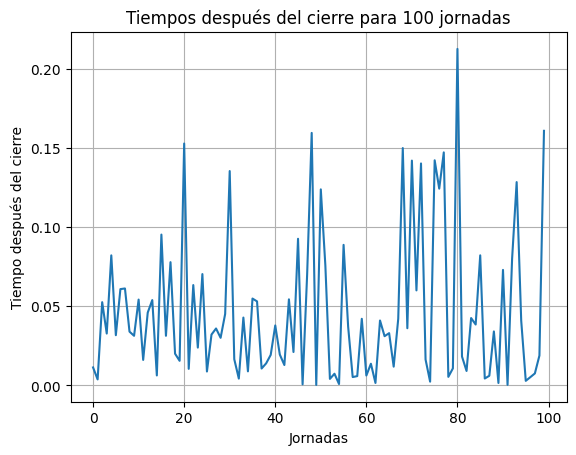

In [9]:
# Simular el tiempo después del cierre para n jornadas
def tcierre(n, LL, cierre):
    tc = []
    for i in range(n):
        resultado = unserv(LL, cierre)
        tc.append(resultado['tiempo después cierre'])
    return tc

# Graficar el tiempo después del cierre para 100 jornadas
tc = tcierre(100, LL, 9)
plt.plot(tc)
plt.title('Tiempos después del cierre para 100 jornadas')
plt.xlabel('Jornadas')
plt.ylabel('Tiempo después del cierre')
plt.grid(True)
plt.show()